In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


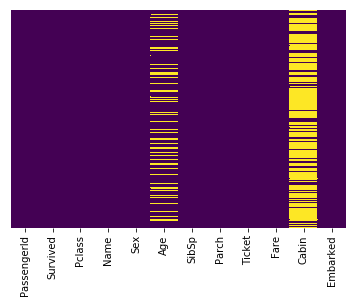

In [5]:
# the yellow ones shows the NaN values in dataset...mainly present in age and cabin
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels = False)

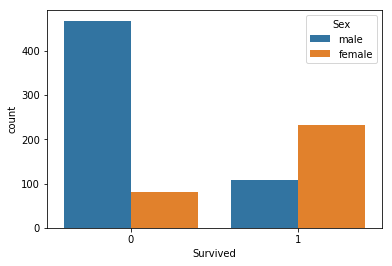

In [6]:
# this tells us that most of the ppl that did not survive were males and most of them who survived were female
sns.countplot(data=train,x='Survived',hue='Sex')

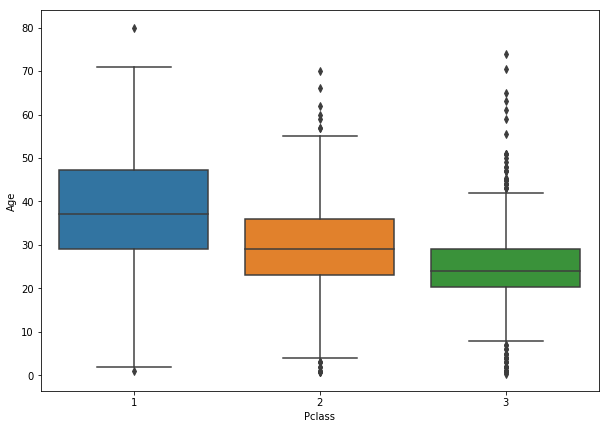

In [19]:
plt.figure(figsize=(10,7))
# finding the average age of passengers in class 1 ,2 and 3 respectively for filling the NaN value.
sns.boxplot(x='Pclass',y='Age',data = train)

In [8]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [9]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

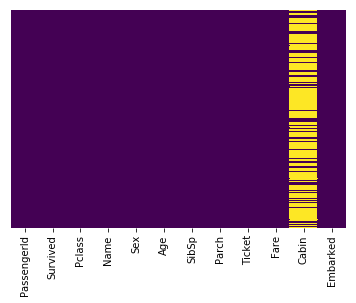

In [10]:
# missing values in Age filled 
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels = False)

In [11]:
# since cabin has a lot of NaN values so we are going to drop the column Cabin
train.drop('Cabin',axis =1 ,inplace = True)
# now train.shape = (891,11)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


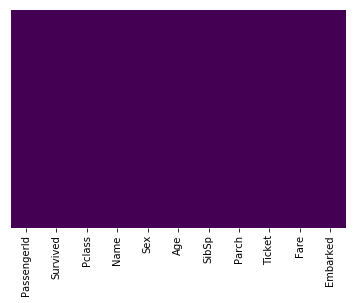

In [12]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels = False)
#the figure shows that there is no missing value left now

In [13]:
# since the train model consists of categorical data(ex- sex,name,embarked etc) so we need to convert it into numerical data
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [14]:
embark = pd.get_dummies(train['Embarked'],drop_first=1)


In [15]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [16]:
# dropping the irrelevant columns like embarked,sex,name etc.
train.drop(['Embarked','Name','Sex','Ticket','PassengerId'],axis=1,inplace=True)

In [17]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
train.shape

(891, 9)

In [21]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
predictions = clf.predict(X_test)

In [30]:
# accuracy of the mdel is  77%
clf.score(X_test,y_test)

0.7723880597014925

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[133  21]
 [ 40  74]]


In [37]:
(133+74)/268

0.7723880597014925